# **Herramientas de Análisis**

---
---

<!-- script html for image -->

<center>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Sw-ep1-logo.svg/1280px-Sw-ep1-logo.svg.png"  width="500" height="150"/>


<br>

Fuente de la imagen: [https://es.wikipedia.org](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_I_-_La_amenaza_fantasma)

</center>

<br>

# NOMBRE: Elizabeth Evelin Peredo Mescco

# **Índice**

---
---

> [Herramientas de Análisis](#scrollTo=tW3jK_BDgjno&line=20&uniqifier=1)
<br>
>>
>> [Preparación del Entorno](#scrollTo=5zZfGqOugjnr&line=3&uniqifier=1) \\
>>   \\
>> [Ejercicio 1](#scrollTo=1J4h6kTngjn5&line=1&uniqifier=1) \\
>>

# Preparación del entorno

Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.

In [ ]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/mbdds_fc20.git /content/mbdds_fc20
    !git -C /content/mbdds_fc20 pull
    %cd /content/mbdds_fc20/Python
    !python -m pip install -r requirementsColab.txt

# Ejercicio 1

Para realizar el ejercicio cargamos los datos de *Especies* en STARWARS SWAPI y las librerías principales.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # para el estilo de graficos

In [72]:
entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}

# Datos principales
people_df = entidades_df['people'][["height","mass","birth_year","gender","homeworld"]].dropna()

people_df

,height,mass,birth_year,gender,homeworld
name,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/
Owen Lars,178.0,120.0,52.0,male,http://swapi.dev/api/planets/1/
Beru Whitesun lars,165.0,75.0,47.0,female,http://swapi.dev/api/planets/1/
Biggs Darklighter,183.0,84.0,24.0,male,http://swapi.dev/api/planets/1/
Obi-Wan Kenobi,182.0,77.0,57.0,male,http://swapi.dev/api/planets/20/


## Ejercicio 1.1. 

Construye un gráfico de dispersión de los personajes donde se visualice: la altura (height), el peso (mass), la edad en años BBY (birth_year) y el género (gender). Para ello utiliza la función `sns.scatterplot()` de la librería seaborn. Aprovecha todos los parámetros: `x`, `y`, `size`, `hue` y `style` (consulta la ayuda de la función [.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

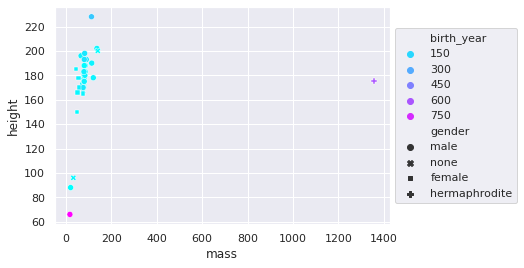

In [73]:
# Solución:
grafico1=sns.scatterplot(
    data=people_df, 
    x="mass", 
    y="height", 
    hue="birth_year", 
    style="gender",
    palette='cool')
grafico1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Ejercicio 1.2.

Sobre el gráfico del ejercicio 1.1:

- Pon título al gráfico y a los ejes x e y. 
- Modifica los límites del eje y para que aparezcan sólo personajes de menos de 150 Kg de peso.
- Sitúa en el gráfico los nombres de "Darth Vader" y "Anakin Skywalker". ¿Cómo es posible tengan un peso y altura tan distintos si eran la misma persona?

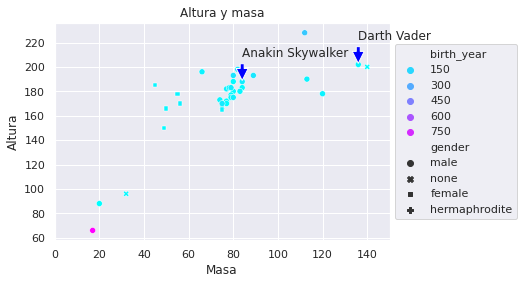

In [74]:
# Solución:
grafico1=sns.scatterplot(
    data=people_df, 
    x="mass", 
    y="height", 
    hue="birth_year", 
    style="gender",
    palette='cool')
grafico1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Titulo al g´raficos y a los ejes x e y
grafico1.set_title("Altura y masa")
grafico1.set(xlabel='Masa', ylabel='Altura')

# Limite del eje x = masa
grafico1.set_xlim([0,150])

people_df1=people_df.reset_index(drop=False)

for i in range(0,people_df1.shape[0]):
  if people_df1.name[i]=="Darth Vader" or people_df1.name[i]=="Anakin Skywalker":
    # Forma 1: text
     """plt.text(people_df1.mass[i], 
              people_df1.height[i], 
              people_df1.name[i], 
              horizontalalignment='left', 
              size='medium')"""

     # Forma 2: annotate
     plt.annotate(people_df1.name[i],
                  xy=(people_df1.mass[i],people_df1.height[i]),
                  xytext =(people_df1.mass[i],people_df1.height[i]+20),
                  arrowprops = dict(facecolor ='blue',
                                  shrink = 0.05),)
                  
plt.show()

## Ejercicio 1.3.

Utiliza las *list comprehension* para calcular el cuadrado de los valores positivos de la siguiente lista:

Muestra el resultado por pantalla.

In [75]:
val = [5, 6, -1, 2, -3, -7, 9, 1]

In [76]:
# Solución:
new_val = [x*x for x in val if x>0]
print(new_val)


[25, 36, 4, 81, 1]


## Ejercicio 1.4.

Construye un diccionario donde se identifique, mediante claves y valores, las siguientes características del personaje Yoda: "nombre", "altura", "peso", "edad" y "genero". Utiliza los datos de people_df.

Muestra el diccionario por pantalla.

In [77]:
# Solución:
#datos4=people_df[["name","height","mass","birth_year","gender"]]

diccionario=(people_df.iloc[:,0:4]).to_dict('index')

yoda = { key:value 
           for (key,value) in diccionario.items() if key == "Yoda"}

print(yoda)


{'Yoda': {'height': 66.0, 'mass': 17.0, 'birth_year': 896.0, 'gender': 'male'}}


## Ejercicio 1.5.

Calcula, a partir de los vectores numpy de altura y peso, definidos a continuación, el [índice de masa corporal (IMC)](https://es.wikipedia.org/wiki/%C3%8Dndice_de_masa_corporal) de los personajes de star wars contenidos en people_df: 

$IMC = \frac{peso}{altura^{2}}$ donde altura está en metros y el peso en kg.

Muestra los datos por pantalla.

In [78]:
# Solución:
IMC = np.array(people_df["mass"]) / (np.array(people_df["height"])/100)**2
print(IMC)

[ 26.02758248  26.89232314  34.72222222  33.33006568  21.77777778
  37.87400581  27.54820937  25.08286303  23.24598478  23.76641014
  21.5450908   24.69135802  24.72518293 443.42857143  26.64359862
  39.02662994  25.95155709  23.35095106  35.          31.30193906
  25.21625331  25.79591837  25.61728395  25.82644628  23.89325888
  13.14828342  17.18034152  26.12244898  17.35891933  23.76641014
  20.91623304  22.63467632  19.44636678  18.14486863  21.47708663
  23.58983547]


## Ejercicio 1.6.

A partir del IMC que has calculado en el ejercicio 1.5. Construye un panel con dos histogramas:

- Un histograma con toda la muestra
- Un histograma seleccionando los valores con un IMC inferior a 100.

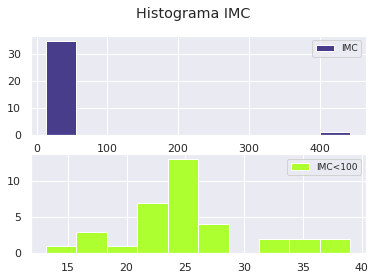

In [79]:
# Solución:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Histograma IMC')
ax1.hist(x=IMC, color='#483D8B')
ax1.legend((["IMC"]), loc='best',prop={'size': 9})
ax2.hist(IMC[IMC<100], color='#ADFF2F')
ax2.legend((["IMC<100"]), loc='best',prop={'size': 9})

plt.show()

## Ejercicio 1.7.

A partir del vector 1 y 2 que se definen a continuación contesta las siguientes preguntas:

- Calcula el shape, ndim, size del vector1 y vector2
- Explica cual es la diferencia entre vector1 y vector2 a partir de los que hayas observado

In [80]:
#vector1 = np.hstack([altura,peso])
#vector2 = np.vstack([altura,peso])

In [81]:
# Solución:
peso = np.array(people_df["mass"]) 
altura = np.array(people_df["height"])
vector1 = np.hstack([altura,peso])
vector2 = np.vstack([altura,peso])

print("HSTACK -> SHAPE: ",str(vector1.shape),
      "NDIM: ",str(vector1.ndim),
      "SIZE: ",str(vector1.size))

print("VSTACK -> SHAPE: ",str(vector2.shape),
      "NDIM: ",str(vector2.ndim),
      "SIZE: ",str(vector2.size))

""" 
La diferencia entre hstack y vstack es 
que la primera muestra la unión en forma
horizontal (hstack) por eso el shape es '72',
por otro lado vstack muestra la unión de
forma vertical '2,36'
"""

HSTACK -> SHAPE:  (72,) NDIM:  1 SIZE:  72
VSTACK -> SHAPE:  (2, 36) NDIM:  2 SIZE:  72


" \nLa diferencia entre hstack y vstack es \nque la primera muestra la unión en forma\nhorizontal (hstack) por eso el shape es '72',\npor otro lado vstack muestra la unión de\nforma vertical '2,36'\n"

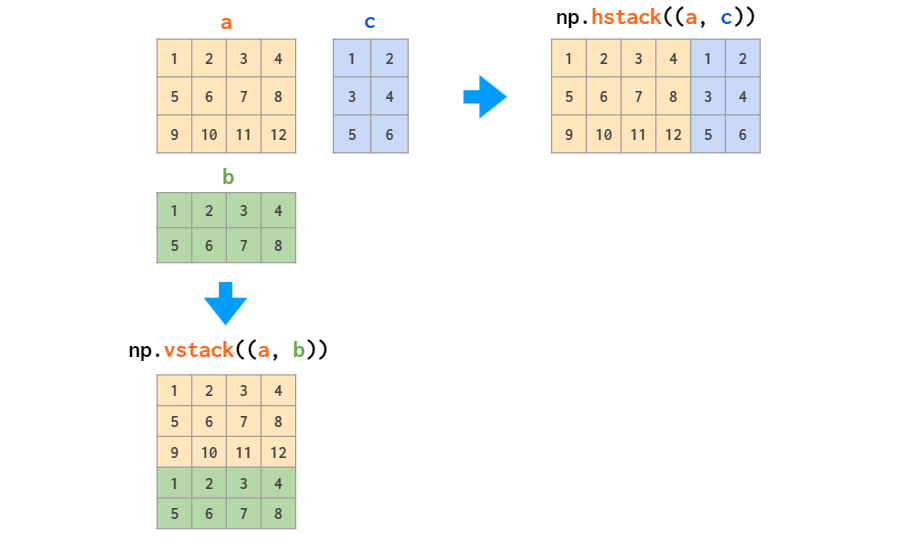

## Ejercicio 1.8.

Crea una copia de people_df llamada personajes_df y renombra las columnas con su traducción al castellano. 

Muestra los 5 primeros registros del nuevo data frame con `.head()`.

In [82]:
# Solución:
personajes_df=people_df.rename_axis(index='nombre')
personajes_df.columns=['altura','peso','edad','género','home']
personajes_df.head(5)

,altura,peso,edad,género,home
nombre,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/


## Ejercicio 1.9.

Haz el mismo cálculo de IMC que has hecho en 1.5. pero directamente sobre el objeto personajes_df.

Ordena el data frame de mayor a menor IMC y muestra el nombre e IMC de los personajes con IMC por encima de 30.

> ¿Sabias que IMC por encima de 30 se considera obeso?


In [90]:
# Solución:
personajes_df=personajes_df.assign(
    IMC=personajes_df["peso"]/(personajes_df["altura"]/100)**2)

personajes_df=personajes_df.sort_values("IMC", ascending = False).\
    loc[personajes_df.IMC > 30, ["IMC"]]

personajes_df.head()

,IMC
nombre,
Yoda,39.026630
Owen Lars,37.874006
IG-88,35.000000
R2-D2,34.722222
Darth Vader,33.330066


## Ejercicio 1.10.

Inserta un valor faltante en los valores de IMC que sean superiores a 100 y dibuja el histograma del IMC transformado con `.plot.hist()`.

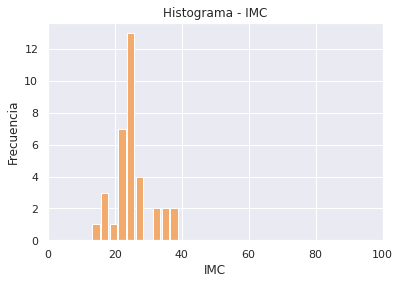

In [88]:
# Solución:
personajes_df[personajes_df.IMC > 100] = np.nan

plt.hist(personajes_df.IMC, color='#F2AB6D', rwidth=0.85)
plt.title("Histograma - IMC")
plt.xlabel('IMC')
plt.ylabel('Frecuencia')

plt.xlim([0,100])
plt.show()